<a href="https://colab.research.google.com/github/vitorquintella/LetsCode-Exercicios/blob/main/Covid_Primeira_abordagem_Vitor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparação dos Dados e Verificação de Consistência
**Disclaimer:** Os dados são uma amostra enviesada da população, pois apenas retrata quem chegou a fazer o teste do covid e que tiveram os dados acrescidos a esta pesquisa.

- Por exemplo, se falarmos no notebook que mulheres tendem a não ter covid, leia-se: "As mulheres que chegaram a arealizar o teste do covid na situação de coleta destes dados tendem a não ter covid. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Não consegui fazer a leitura direto do github
# data_url = 'https://raw.githubusercontent.com/vitorquintella/LetsCode-Exercicios/main/Covid_exercício/covid.csv'
# df_original= pd.read_csv(data_url, encoding='utf-8', sep=',')

# Leitura do arquivo
df_original= pd.read_csv('covid.csv')

In [ ]:
df = df_original.copy()

In [ ]:
# Reorganizando ordem das colunas para uma ordem mais simples
df = df[['id',
        'entry_date', 'date_symptoms', 'date_died',
        'sex', 'age', 'pregnancy', 'contact_other_covid',
        'patient_type', 'icu', 'intubed', 
        'pneumonia',
        'copd', 'asthma', 'inmsupr',
        'hypertension', 'cardiovascular', 'renal_chronic', 'diabetes',
        'other_disease', 'obesity', 'tobacco', 
        'covid_res']]

In [ ]:
# Organizando informações em 0 e 1 (False/True)

dict_si_no = {2: 0,
              1: 1}
dict_internado = {2: 1,
                  1: 0}

df = df.replace({'sex': dict_si_no,
                 'patient_type': dict_internado,
                 'intubed': dict_si_no,
                 'pneumonia': dict_si_no,
                 'pregnancy': dict_si_no,
                 'diabetes': dict_si_no,
                 'copd': dict_si_no,
                 'asthma': dict_si_no,
                 'inmsupr': dict_si_no,
                 'hypertension': dict_si_no,
                 'other_disease': dict_si_no,
                 'cardiovascular': dict_si_no,
                 'obesity': dict_si_no,
                 'renal_chronic': dict_si_no,
                 'tobacco': dict_si_no,
                 'covid_res': dict_si_no,
                 'contact_other_covid': dict_si_no,
                 'icu': dict_si_no})

df = df.rename(columns = {'sex': 'female',
                          'patient_type': 'hospitalized'})

In [ ]:
# 12% da nossa amostra não possuem dados de resultado de covid. 
# Essas linhas serão eliminadas pois não acrescentam informações nem ao treino nem ao teste. 

print((df['covid_res'].value_counts()/len(df['covid_res'])).round(2))
df = df[df['covid_res'] != 3]

0    0.49
1    0.39
3    0.12
Name: covid_res, dtype: float64


## Separação de teste

In [ ]:
from sklearn.model_selection import train_test_split

df, df_test = train_test_split(df, random_state = 42, test_size = 0.1)
X = df.drop(columns='covid_res')
y = df['covid_res']
X_test = df_test.drop(columns='covid_res')
y_test = df_test['covid_res']

df.head()

,id,entry_date,date_symptoms,date_died,female,age,pregnancy,contact_other_covid,hospitalized,icu,intubed,pneumonia,copd,asthma,inmsupr,hypertension,cardiovascular,renal_chronic,diabetes,other_disease,obesity,tobacco,covid_res
96336,180fe7,20-06-2020,19-06-2020,9999-99-99,0,59,97,99,0,97,97,0,0,0,0,0,0,0,0,0,0,0,1
142671,133839,13-06-2020,12-06-2020,9999-99-99,0,20,97,1,0,97,97,0,0,0,0,0,0,0,0,0,0,0,1
435408,0d3936,16-06-2020,16-06-2020,9999-99-99,0,64,97,1,0,97,97,0,0,0,0,1,0,0,0,0,0,0,0
192069,0a14f6,02-06-2020,01-06-2020,9999-99-99,0,32,97,0,0,97,97,0,0,0,0,0,0,0,0,0,0,0,1
358788,8.66E+03,03-06-2020,03-06-2020,9999-99-99,1,47,0,0,0,97,97,0,0,0,0,0,0,0,0,0,0,0,0


# Análise Exploratória dos Dados

In [ ]:
# Vamos começar sem explorar ids e datas
X = X.drop(columns = ['id', 'entry_date','date_symptoms','date_died'])
df = df.drop(columns = ['id', 'entry_date','date_symptoms','date_died'])

df.head()

,female,age,pregnancy,contact_other_covid,hospitalized,icu,intubed,pneumonia,copd,asthma,inmsupr,hypertension,cardiovascular,renal_chronic,diabetes,other_disease,obesity,tobacco,covid_res
96336,0,59,97,99,0,97,97,0,0,0,0,0,0,0,0,0,0,0,1
142671,0,20,97,1,0,97,97,0,0,0,0,0,0,0,0,0,0,0,1
435408,0,64,97,1,0,97,97,0,0,0,0,1,0,0,0,0,0,0,0
192069,0,32,97,0,0,97,97,0,0,0,0,0,0,0,0,0,0,0,1
358788,1,47,0,0,0,97,97,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# A Maior parte das pessoas não deram positivo para covid.
print((df['covid_res'].value_counts()/len(df['covid_res'])).round(2))

0    0.56
1    0.44
Name: covid_res, dtype: float64


In [ ]:
# A maior parte dos dados fora da dos casos normais apresentados no catalogo é pequena comparada com os dados existentes. 
# Não vamos alterar nada nestes dados por enquanto.

# Vizualização completa das distribuições
# for col in df.columns:
#   print((df[col].value_counts()/len(df[col])).round(2))

# Unicas variaveis com quantidades significativas de valores que não eram 0 ou 1, foram:
'intubed', 'pregnancy', 'contact_other_covid'
print((df['intubed'].value_counts()/len(df['intubed'])).round(2))
print((df['pregnancy'].value_counts()/len(df['pregnancy'])).round(2))
print((df['contact_other_covid'].value_counts()/len(df['contact_other_covid'])).round(2))

97    0.78
0     0.20
1     0.02
99    0.00
Name: intubed, dtype: float64
97    0.51
0     0.48
1     0.01
98    0.00
Name: pregnancy, dtype: float64
1     0.39
99    0.31
0     0.30
Name: contact_other_covid, dtype: float64


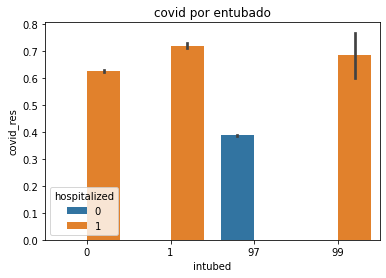

In [ ]:
# A maior parte entubados/não entubados (0/1) tinham covid.
# Isso por que os que não foram hospitalizados estão marcando como 97.
# ToDo: Verificar impacto da variável nos modelos. Se necessário, trabalhar essa feature.
# 99 possui uma quantidade desprezivel.
sns.barplot(data=df, x="intubed", y="covid_res", hue='hospitalized')
plt.title("covid por entubado")
plt.show()

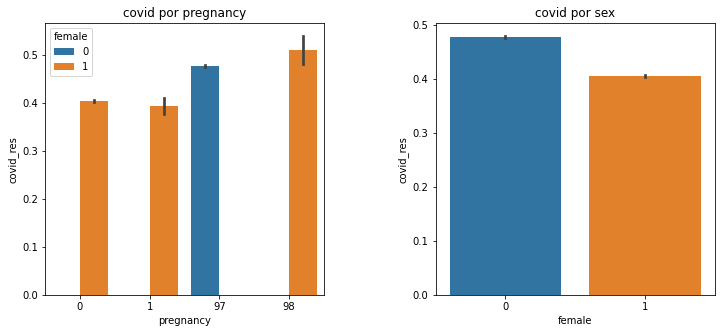

In [ ]:
# Na gravidez, temos poucos positivos e parece não ter muita influência sobre ter ou não covid.
# Homens, são marcados como 97, mulheres quando não se sabe da gravidez são marcadas como 98
# Mulheres de um modo geral tendem a não ter o covid.
# Por parecer ser irformação redundante, talvez valha a pena preencher os homens com gravidez = 0

fig = plt.figure(figsize=(12, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 2, 1)
sns.barplot(data=df, x="pregnancy", y="covid_res", hue='female')
plt.title("covid por pregnancy")

ax = fig.add_subplot(1, 2, 2)
sns.barplot(data=df, x="female", y="covid_res")
plt.title("covid por sex")

plt.show()

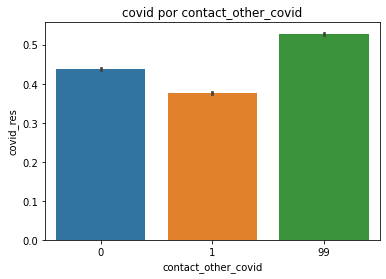

In [ ]:
# Quanto ao contato com otras pessoas com covid, existem diferenças claras entre:
# 0 - não teve, 1 - teve, 99 - não se sabe 
# Pode ser que as informações de contato só tenham sido cobradas em situações específicas.
# A priori os dados devem permancer como estão.

sns.barplot(data=df, x="contact_other_covid", y="covid_res")
plt.title("covid por contact_other_covid")
plt.show()

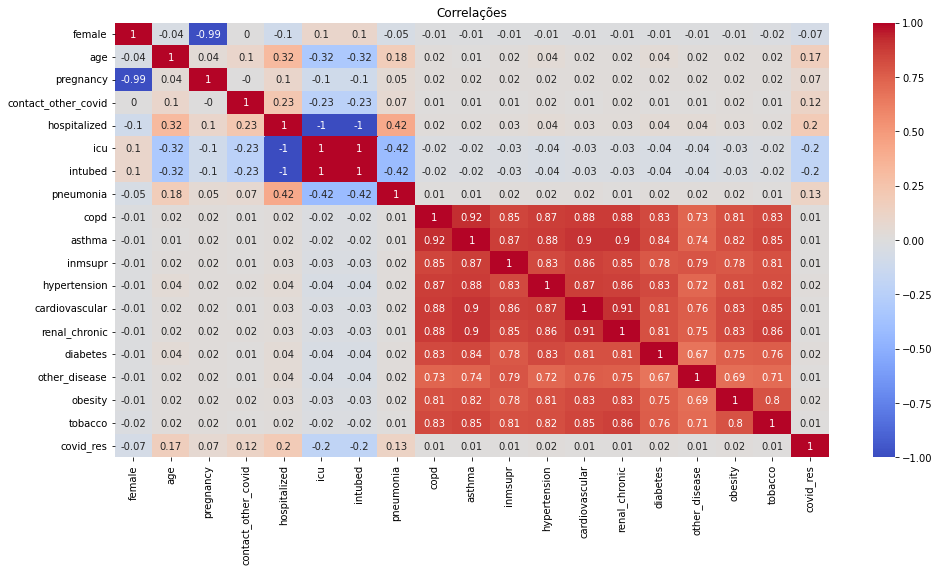

In [ ]:
# Ao analizarmos as correlações é importante lembrar que as variáveis com valores 
# como 97,98,99 terão forte influência. Inicialmente vamos desconsiderar esse aspecto.

# É possível ver que as variáveis, hospitalizado, intensivo e entubado estão fortemente ligados.
# Todo: Verificar a possivilidade unir todas em apenas um ordinal feature
# Idem para as variáveis de doenças
# Pregnancy deve estar influenciado pelos homens (97)
# As variáveis que mais parecem influenciar são: 
# Idade, contato, pneumonia, hospitalizado, unidade intensiva, entubado 

fig = plt.figure(figsize=(16,8))
g = sns.heatmap(df.corr().round(2),
                annot=True, center=0,
                vmin=-1, vmax=1,
                cmap = "coolwarm")
plt.title("Correlações")
plt.show()

# Modelagem dos Dados

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

In [ ]:
# Scaler basico da idade, já que as principais features ficam entre 0 e 1.
# A depender do modelo, ainda vamos sofrer forte influencia da  diferença 
# de grandeza das demais variáveis: normalmente entre 0 e 1, as vezes entre 97 e 99
age_scaler = StandardScaler()
X['age'] =  age_scaler.fit_transform(np.array(X['age']).reshape(-1, 1))

In [ ]:
# Nomeando as features que serão utilizadas, para uso 
feature_names = list(X.columns)

# Deinir Kfold padrão que utilizaremos nesta análise inicial.
kf = KFold(n_splits = 3, random_state = 42, shuffle = True)

## Baseline 00 - mais frequente

In [ ]:
# Nosso modleo básico apresenta f1 ponderado de 0.4
model = DummyClassifier() 
cv_res = cross_val_score(model, X, y, cv = kf,scoring = 'f1_weighted')
print(cv_res.round(4))
print(cv_res.mean().round(4))

[0.4004 0.401  0.3998]
0.4004


## Modelos Preliminares

In [ ]:
# Um modelo de arvore de decisão limitado à profundiade 10 supera o Baseline 00
# O resultado é estavel nos 3 folds.
# Esse modelo vai conseguir lidar bem com os valores anormais.
model = DecisionTreeClassifier(random_state=42, max_depth=10) 
cv_res = cross_val_score(model, X, y, cv = kf, scoring = 'f1_weighted')
print(cv_res.round(4))
print(cv_res.mean().round(4))

[0.623  0.6172 0.6146]
0.6182


In [ ]:
# O modelo gaussiano não apresentou um desempenho tão bem. 
# Este resultado era esperado, uma vez que o modelo supõe distribuições gaussianas 
model = GaussianNB() 
cv_res = cross_val_score(model, X, y, cv = kf, scoring = 'f1_weighted')
print(cv_res.round(4))
print(cv_res.mean().round(4))

[0.5857 0.5832 0.5814]
0.5835


In [ ]:
# O random forest ainda não foi ensinado em aula até o momento do curso.
# Mas estamos utilizando ele como referência mesmo assim.  
# Este resultado era esperado, uma vez que o modelo supõe distribuições gaussianas
# O desempenho encontrado não foi significativamente maior que o da árvore de decisão.
model = RandomForestClassifier(random_state=42, max_depth=20, n_jobs=-1)
cv_res = cross_val_score(model, X, y, cv = kf, scoring = 'f1_weighted')
print(cv_res.round(4))
print(cv_res.mean().round(4))

[0.6169 0.6137 0.6113]
0.614


In [ ]:
# O LGBM ainda não foi ensinado em aula até o momento do curso.
# Mas estamos utilizando ele como referência mesmo assim.  
# O desempenho encontrado não foi significativamente maior que o da árvore de decisão.
model = LGBMClassifier(random_state=42, n_jobs=-1) 
cv_res = cross_val_score(model, X, y, cv = kf, scoring = 'f1_weighted')
print(cv_res.round(4))
print(cv_res.mean().round(4))

[0.6248 0.6195 0.6175]
0.6206


# Otimização do Modelo
Tivemos um empate entre os modelos `RandomForest`, `LGBM`e `DecisionTree`. Pelo princípio da parcimônia, vamos eleger o Decisiontree como melhor modelo, umas vez que ele é o mais simples.
Vamos agora seguir com a otimização dos hiperparâmetros dele.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV 
from scipy.stats import randint

In [ ]:
# Vamos fazer um GridSearch inicial para identificar a ordem de grandeza 
# adequada dos hiperparâmetros. 

espaco_hiperparametros ={'max_depth': [1, 10, 100, 1000],
                         'min_samples_leaf': [1, 10, 100, 1000]}
model = DecisionTreeClassifier(random_state=42) 
search = GridSearchCV(model, espaco_hiperparametros, cv=3, scoring='f1_weighted')
search.fit(X, y)

print(search.cv_results_['mean_test_score'].mean().round(4))
print(f'best params: {search.best_params_}')
# pd.DataFrame(rand_search.cv_results_)

0.6053
best params: {'max_depth': 10, 'min_samples_leaf': 1}


In [ ]:
# Uma vez identificada a ordem de grandeza vamos fazer um random search para um ajuste fino
espaco_hiperparametros ={'max_depth': np.arange(5, 50),
                         'min_samples_leaf': np.arange(1, 200)}

model = DecisionTreeClassifier(random_state=42) 
search = RandomizedSearchCV(model, espaco_hiperparametros, cv=3,
                            n_iter=100, scoring = 'f1_weighted', n_jobs=-1)
search.fit(X, y)

print(search.cv_results_['mean_test_score'].mean().round(4))
print(f'best params: {search.best_params_}')
# pd.DataFrame(search.cv_results_)

0.6159
best params: {'min_samples_leaf': 19, 'max_depth': 9}


## Feature importance

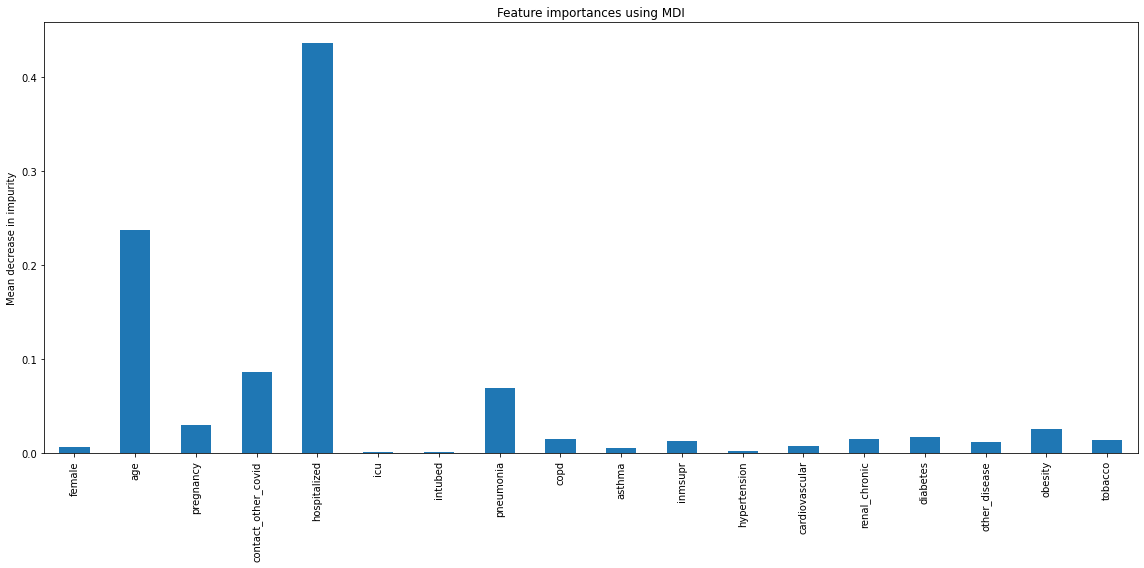

In [ ]:
# Utilizando o modelo de árvore normal
# The importance of a feature is computed as the (normalized) total reduction
#  of the criterion brought by that feature. It is also known as the Gini importance
model = DecisionTreeClassifier(random_state=42, max_depth=10) 
model.fit(X,y)

importances = model.feature_importances_

feature_names = list(X.columns)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(16,8))
forest_importances.plot.bar( ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
# Utilizando o random forest (não aprendemos ainda em aula)
# Porém permite uma visão da variabilidade da importância.
forest = RandomForestClassifier(random_state=42, max_depth=30) 
forest.fit(X, y)

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.136 seconds


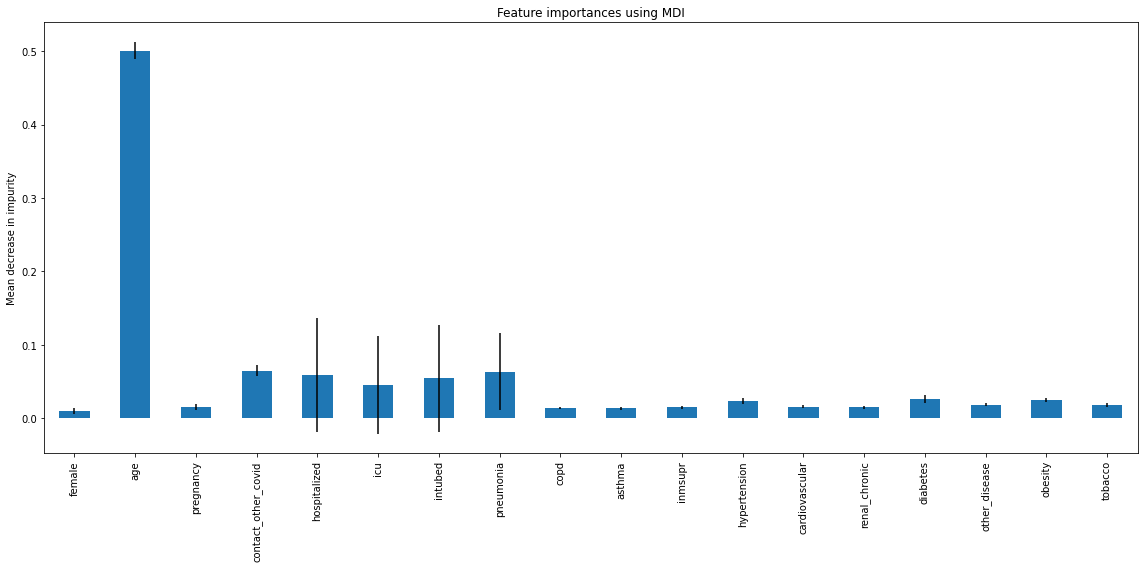

In [ ]:
# Feature importances are provided by the fitted attribute feature_importances_
# and they are computed as the mean and standard deviation of accumulation of 
# the impurity decrease within each tree.

feature_names = list(X.columns)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(16,8))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
# Permutation feature importance overcomes limitations of the impurity-based 
# feature importance: they do not have a bias toward high-cardinality features
# and can be computed on a left-out test set.

import time

from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X, y, n_repeats=5, random_state=42, n_jobs=-1
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Elapsed time to compute the importances: 633.032 seconds


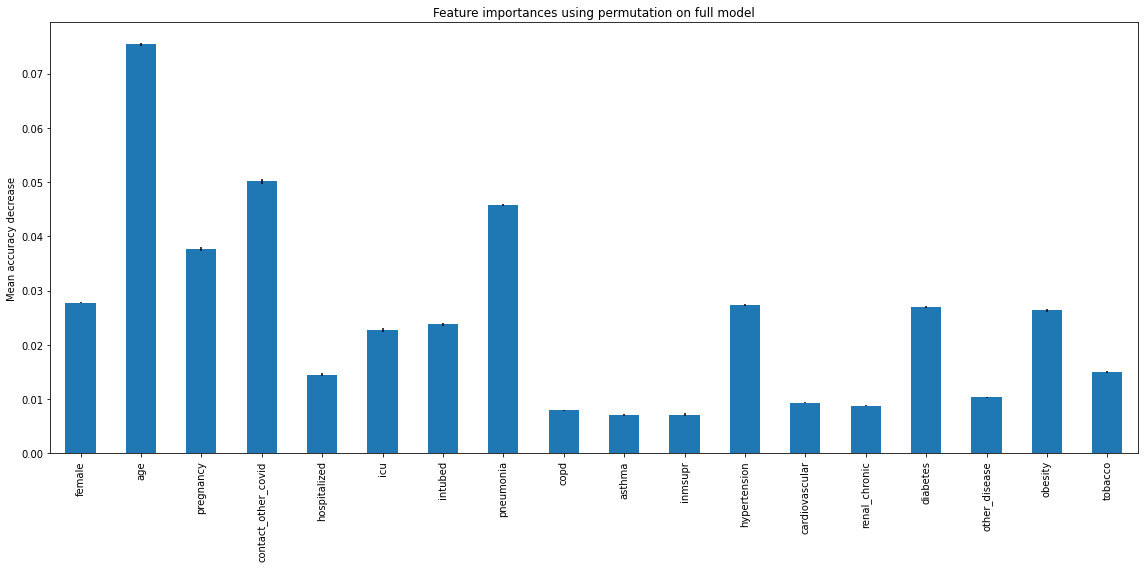

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

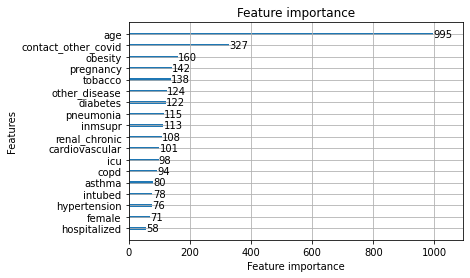

In [ ]:
# Vamos verificar ser o lightgbm converge nas importâncias.
from lightgbm import plot_importance

model = LGBMClassifier(random_state=42,
                      n_jobs=-1) 
model.fit(X,y)
plot_importance(model);

# Conclusões sobre a etapa:
- O feature `age` realmente apresenta maior importancia, seguido pelo contato com outras pessoas com covid.
- Os features referente ao nivel de hospitalização/icu/entubado parecem ter um potencial não explorado; junto com pneumonia.
- Talvez seja possível também agregar maior informação explorando as doenças, elas parecem se sobrepor demasiadamente.